In [1]:
# import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [2]:
# bet of hands
BET_BANKER = "banker"
BET_PLAYER = "player"
BET_TIE = "tie"

# probability occurance of bet of hands
probability_banker = 46
probability_player = 46
probability_tie = 8
# payout ratio
win_payout = 1
tie_payout = 8
# 5% commission for the house
win_commission = 0.05
# each player's initial balance
initial_balance = 10000000

FIG_WIDTH = 16
FIG_HEIGHT = 10

'''
Two players bet on banker and player respectively with different amount
* 2 players play baccarat
* player 1 bet on banker with excessive amount more than player 2
* player 2 bet on player with way less amount
* the probability settings defined in cell "configuration settings"
* this test aims to evaluate the long term result after many rounds (>1000) of playing
'''


'\nTwo players bet on banker and player respectively with different amount\n* 2 players play baccarat\n* player 1 bet on banker with excessive amount more than player 2\n* player 2 bet on player with way less amount\n* the probability settings defined in cell "configuration settings"\n* this test aims to evaluate the long term result after many rounds (>1000) of playing\n'

In [3]:
bets = [
    {"bet": BET_BANKER, "amount": 1000},
    {"bet": BET_PLAYER, "amount": 10},
]

class Player:
    def __init__(self, name, balance):
        self.name = name
        self.initial_amount = balance
        self.balance = balance
        self.bet = ""
        self.bet_amount = 0
    def place_bet(self, bet, amount):
        self.bet_hand = bet
        self.bet_amount = amount
    def pay_collect(self, result):
        win_loss = 0
        if self.bet_hand == "":
            # player did not bet, no win nor lose
            pass
        elif result == self.bet_hand:
            # player's bet win
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            elif result == BET_TIE:
                payout = tie_payout
            win = payout * self.bet_amount
            win_loss = win * (1 - win_commission)
        else:
            # player's bet losed
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            else:
                payout = 0
            win_loss = -1 * payout * self.bet_amount
        self.balance += win_loss
        return win_loss

class Baccarat:
    def __init__(self, player, probability_banker, probability_player, probability_tie):
        self.player = player
        self.probability_banker = probability_banker
        self.probability_player = probability_player
        self.probability_tie = probability_tie
        self.balance = 0
        self.bet_record = []
        self.record_index = 0
    def deal(self):
        num_random = random.randrange(0, 100)
        if num_random < self.probability_banker:
            result = BET_BANKER
        elif num_random < (self.probability_banker + self.probability_player):
            result = BET_PLAYER
        else:
            result = BET_TIE
        return result
    def conclude(self, result):
        profitloss = 0
        for i in player:
            win_loss = player[i].pay_collect(result)
            self.bet_record.append({"match": self.record_index, "result": result, "player": player[i].name, "winloss": win_loss})
            profitloss -= win_loss
        self.balance += profitloss
        self.bet_record.append({"match": self.record_index, "result": result, "player": "house", "winloss": profitloss})
        self.record_index += 1
    def print(self):
        print("result player winloss")
        for record in self.bet_record:
            print("{0} {1} {2}".format(record['result'], record['player'], record['winloss']))
    def df(self):
        df = pd.DataFrame.from_dict(self.bet_record)
        return df

def show_result(bet_record_df):
    player_group = bet_record_df.groupby('player')
    num_matches = player_group.get_group('house')['match'].count()

    # show statistic
    display(HTML('<h1>Game result statistic ({0})</h1>'.format(num_matches)))
    print(player_group.get_group('house').value_counts(['result'], normalize=True))

    # plot balanace
    display(HTML('<h1>Players record statistic ({0})</h1>'.format(num_matches)))
    df_winloss = bet_record_df[['match', 'player', 'winloss']]
    df = df_winloss.pivot(index=['match'], columns=['player'], values=['winloss'])
    display(HTML('<h2>All players cumulative balance</h2>'))
    df_cumsum_all = df.cumsum()
    df_cumsum_all.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    plt.show()
    # display(HTML('<h2>House cumulative balance</h2>'))
    # df_cumsum_1 = df_cumsum_all['winloss']['house']
    # df_cumsum_1.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    # plt.show()


result
player    0.465
banker    0.460
tie       0.075
dtype: float64


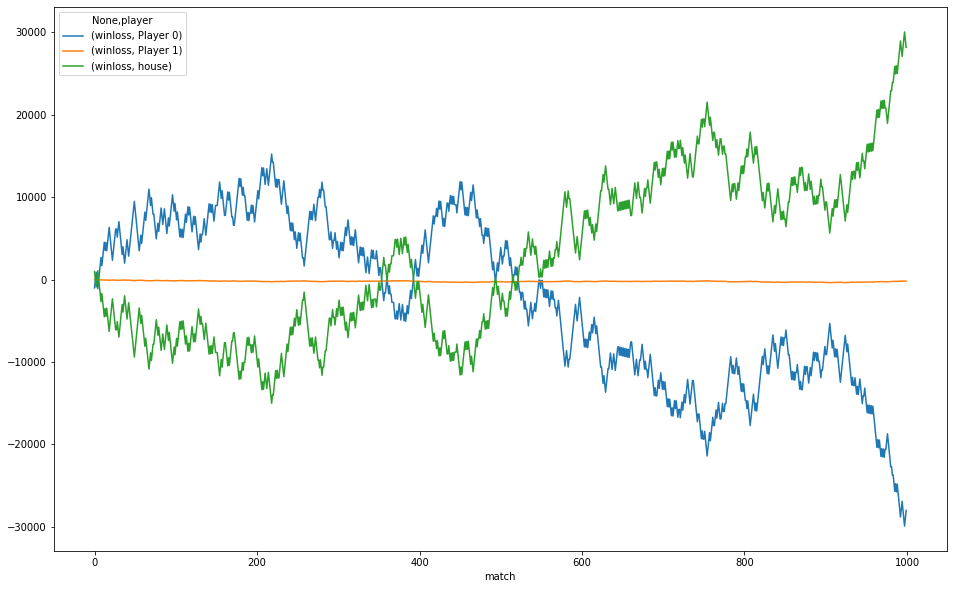

result
player    0.4693
banker    0.4523
tie       0.0784
dtype: float64


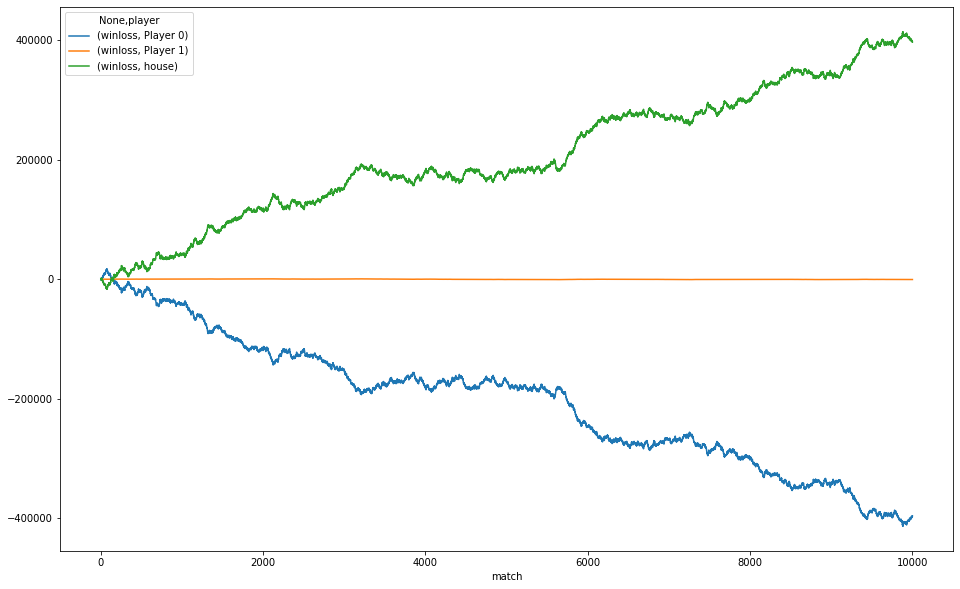

result
banker    0.46175
player    0.45930
tie       0.07895
dtype: float64


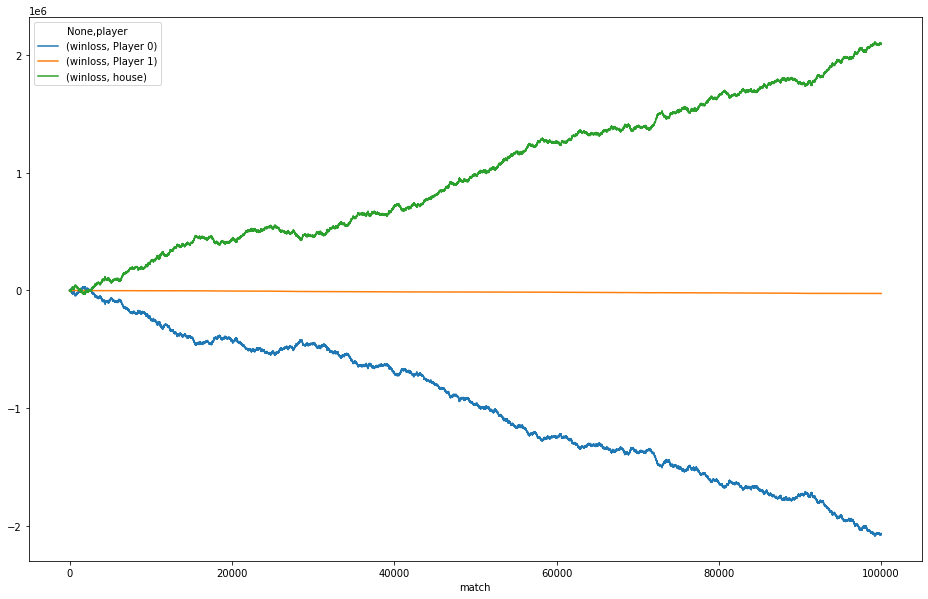

In [4]:
# test cases of number of matches to play
test_matches = [1000, 10000, 100000]

num_players = len(bets)
for num_matches in test_matches:
    player = {i: Player("Player {0}".format(i), initial_balance) for i in range(num_players)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


In [5]:
display(HTML('<h1>All tests finished.</h1>'))
